# Section B. Prediction Uncertainty with Bootstrapping

## Question 3 [Bootstrapping, 25 Marks]

In [1]:
library(reshape2)
library(ggplot2)
library(repr)

Warning message:
"package 'ggplot2' was built under R version 4.0.2"
Warning message:
"package 'repr' was built under R version 4.0.2"


### 3.1
##### Modify the code in Activity 1.2 to handle bootstrapping for KNNregression.

In [2]:
knn_regressor = function(train_data, train_label, test_data, K=3){
    # Calculating the length of the training and testing data sets 
    train_len = nrow(train_data)
    test_len = nrow(test_data)
    
    # Calculating the euclidean distance between each data points
    distance = as.matrix(dist(rbind(test_data, train_data), method="euclidean"))
    # Filter and keep the distances between train and test data points 
    distance = distance[1: test_len, (test_len + 1): (train_len + test_len)]
    
    # Create dataframe to record prediction results
    test_predictions = data.frame("index" = 1:test_len, "prediction" = 0)
    
    # For each test datapoint
    for (i in 1:test_len){
        # Calculate nearest train data points
        K_nearest_neighbours = sort(distance[i,], index.return = TRUE)$ix[1:K]
        # Calculate average value of nearest neighbouring data points as prediction
        prediction = mean(train_label[K_nearest_neighbours,])
        # Record predicted value
        test_predictions[i, "prediction"] = prediction 
    }
   
    return (test_predictions)
}

In [3]:
# Error functions

#Root mean squared error
RMSE <-  function(predictions, labels){
    error = mean((predictions - labels)^2)
    return (error)
}

# mean absolute error
MAE = function(predictions, labels){
    error = mean(abs(predictions - labels))
}

In [4]:
bootstrap = function(original_size=100, sample_size=original_size, timez=100){
    indexx = matrix(nrow=timez, ncol=sample_size)
    for (t in 1:timez){
        indexx[t, ] = sample(x=original_size, size=sample_size, replace = TRUE)
    }
    return(indexx)
}

### 3.2
##### Load Task1B_train.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression with times = 30 (the number of subsets),size = 60 (the size of each subset), and change K=1,..,20 (the neighbourhoodsize). Now create a boxplot where the x-axis is K, and the y-axis is the averagetest error (and the uncertainty around it) corresponding to each K. Save theplot in your Jupyter Notebook file for Question 3.

In [5]:
# Reading the training dataset
train = read.csv("Data_set/Task1B_train.csv")
train_data = train[1:4]
train_label = train[5]

# Reading the testing dataset
test = read.csv("Data_set/Task1B_test.csv")
test_data = test[1:4]
test_label = test[5]

In [6]:
K = 20          # Maximum K for KNN (neighbourhood size)
L = 30          # number of subsets
N = 60          # size of each subset

boot.indexx <- bootstrap(nrow(train_data), N, L)
error <- data.frame('K'=0, 'L'=0, 'error'=rep(0,L*K))

i = 0
# for every number of nearest neighbours
for (k in 1: K){
    # for every dataset
    for (l in 1:L){
        
        # calculate iteration index i
        i = i + 1
        
        # get training data sample indices from bootstrap
        indexx <- boot.indexx[l,]
        
        # save the value of k and l
        error[i,'K'] <- k
        error[i,'L'] <- l
        
        train_data_sample = train_data[indexx, ]
        train_label_sample = data.frame("label"=train_label[indexx,])
        
        predictions = knn_regressor(train_data_sample, train_label_sample, test_data, K=k)
        
        # calculate and record the train and test missclassification rates
        error[i,'error'] <-  MAE(predictions$prediction, test_label[,1])
    } 
}

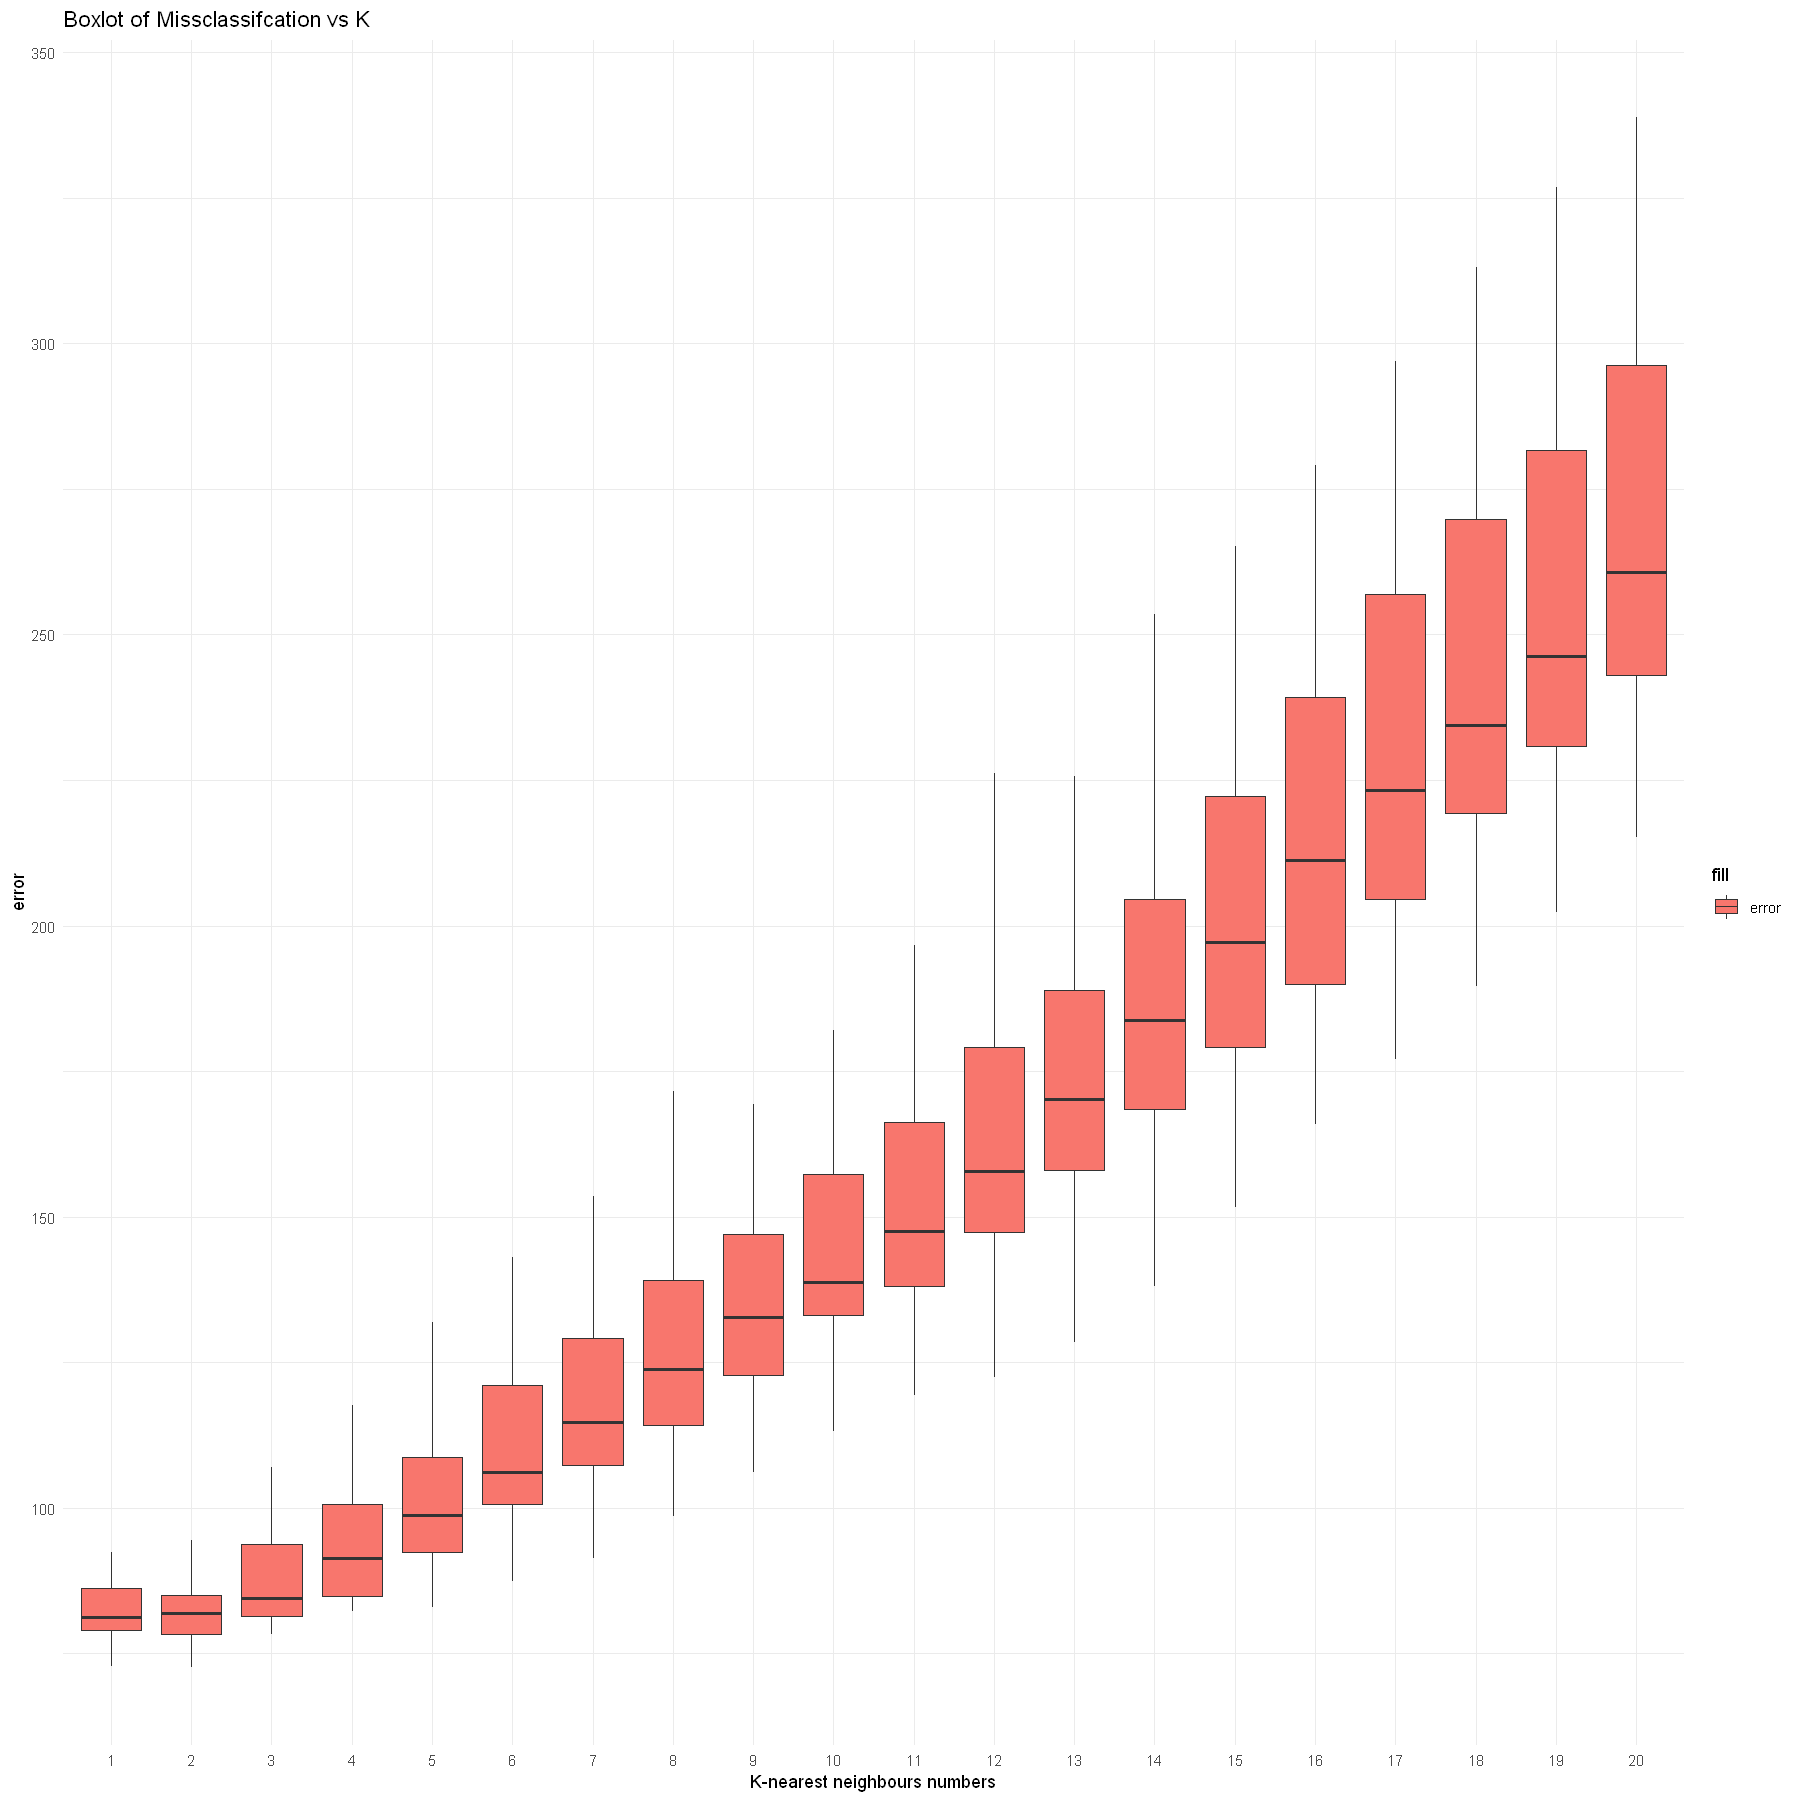

In [7]:
# resizing plot
options(repr.plot.width=15, repr.plot.height=15)

#plotting using ggplot2
ggplot(data=error, aes(x=factor(K), y=error, fill='error')) + geom_boxplot(outlier.shape = NA)  + 
    ggtitle('Boxlot of Missclassifcation vs K') +xlab("K-nearest neighbours numbers")+ theme_minimal()



### 3.3
##### Based on the plot in the previous part (Part П), how does the test error and its uncertainty behave as K increases? Explain in your JupyterNotebook file.

Answer: As K increases, KNN model complexity decreses and it becomes much simpler which may casue underfitting. Hence, by increasing the K, we can notice that the error distribution has greater variance. Thus, its safe to conclude that as K increases, we can see the uncertainty in the test error increase and vice versa.

### 3.4
##### Load Task1B_train.csv and Task1B_test.csv sets. Apply your bootstrapping for KNN regression with K=5 (the neighbourhood size),times = 50 (the number of subsets), and change sizes = 5, 10, 15,..., 75 (thesize of each subset). Now create a boxplot where the x-axis is ‘sizes’, andthe y-axis is the average test error (and the uncertainty around it)corresponding to each value of ‘sizes’. Save the plot in your JupyterNotebook file for Question 3.

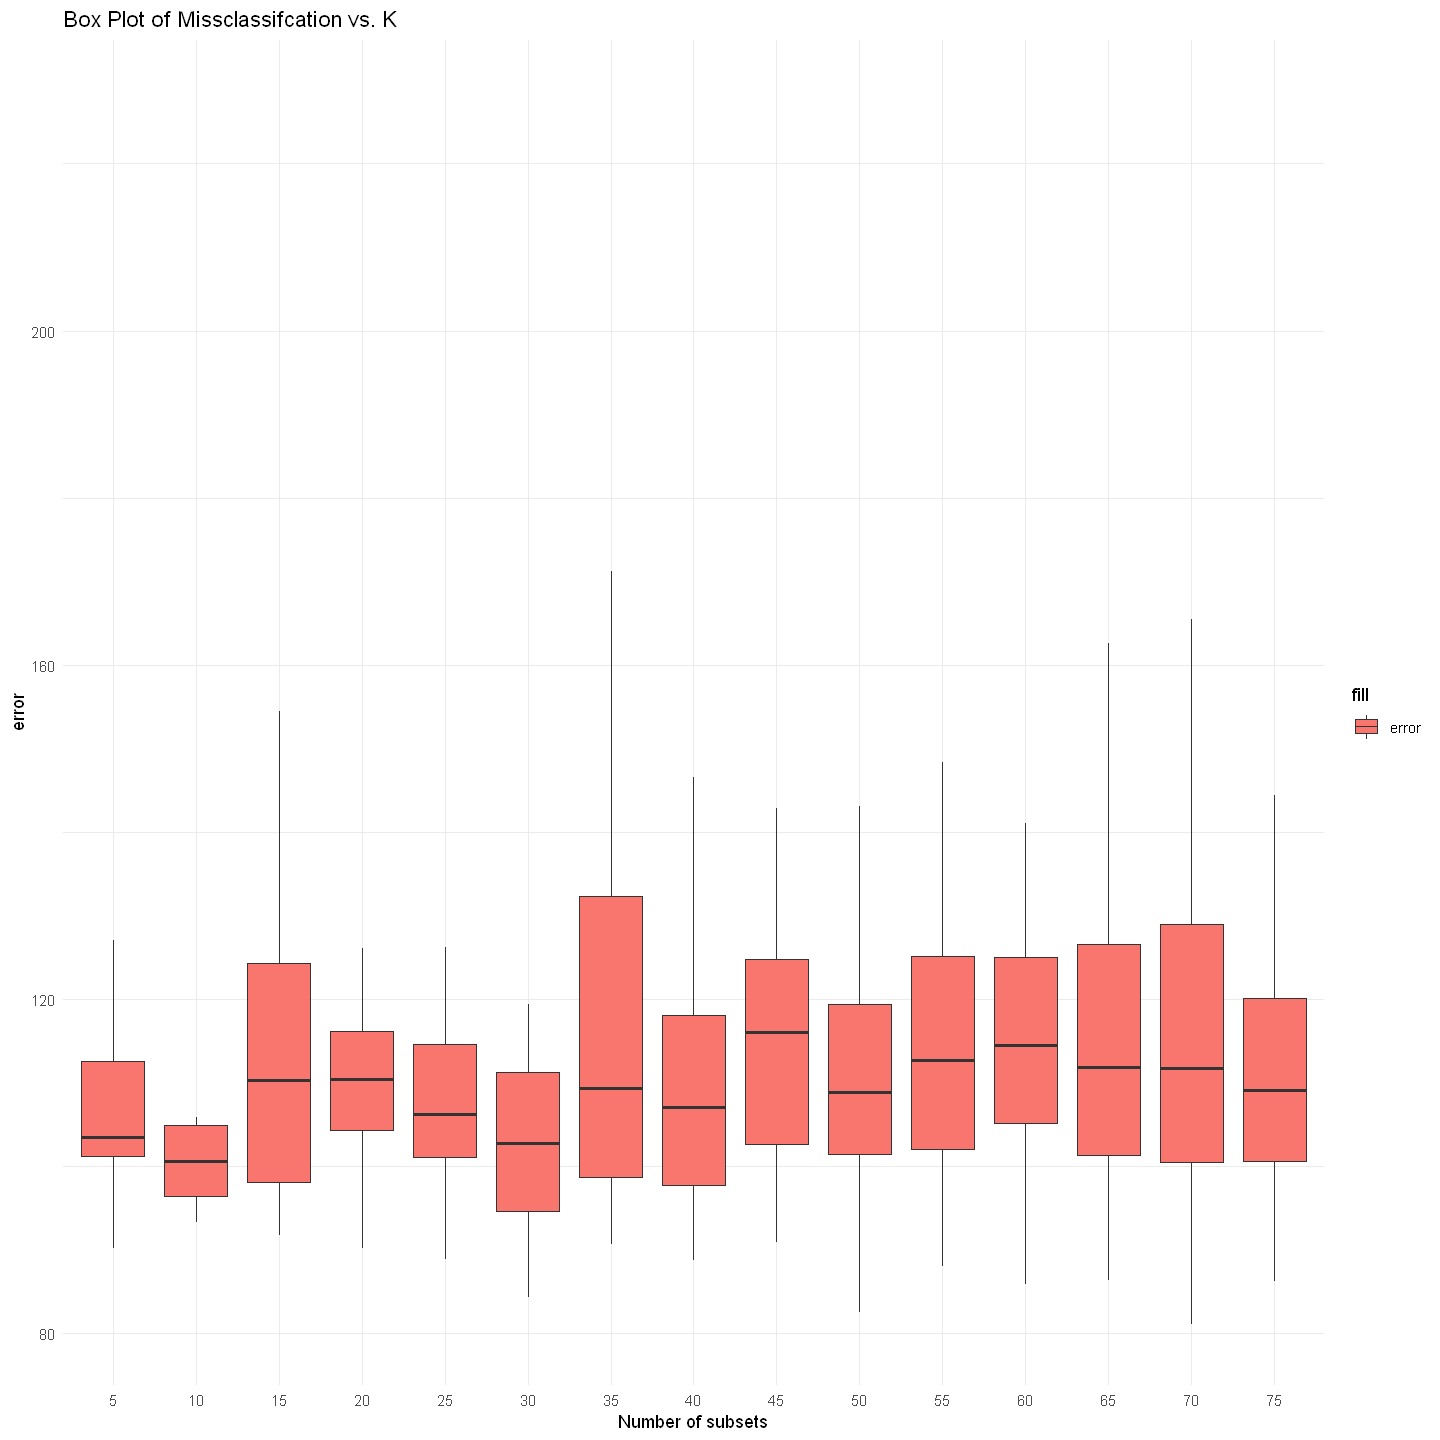

In [8]:
K = 5 # Maximum K for KNN 
N = 50 # size of subsets

error <- data.frame('L'=0, 'error'=rep(0,sum(L)))

i = 0
# for every number of nearest neighbours
for (L in seq(5, 75, 5)){
    boot.indexx <- bootstrap(nrow(train_data), N, L)
    # for every dataset
    for (l in 1:L){
        
        # calculate iteration index i
        i = i + 1
        
        # get training data sample indices from bootstrap
        indexx <- boot.indexx[l,]
        
        # save the value of and L
        error[i,'L'] <- L
        
        # Generate training data sample
        train_data_sample = train_data[indexx, ]
        train_label_sample = data.frame("label"=train_label[indexx,])
        
        # Prediction
        predictions = knn_regressor(train_data_sample, train_label_sample, test_data, K=K)
        
        # Calculate and record error
        error[i,'error'] <-  MAE(predictions$prediction, test_label[,1])
    } 
}


# resizing plot
options(repr.plot.width=12, repr.plot.height=12)

#plotting using ggplot2
ggplot(data=error, aes(x=factor(L), y=error, fill='error')) + geom_boxplot(outlier.shape = NA)  + 
    ggtitle('Box Plot of Missclassifcation vs. K') + theme_minimal() + xlab('Number of subsets')



### 3.5
##### Based on the plot in the previous part (Part IV), how does the test error and its uncertainty behave as the size of each subset in bootstrapping increases? Explain in your Jupyter Notebook file.

Answer: The plot above highlights that as the size of each subset in bootstrapping increases as we train, the distribution of the errors produced due to the multiple runs of KNN tends to become more predictable (having less uncertainty). This will aid us to figure out the precise errors for the model.